---
title: "Multiple linear regression"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

## Multiple Linear Regression

Multiple Linear Regression
Multiple or multivariate linear regression is a case of linear regression with two or more independent variables.

If there are just two independent variables, the estimated regression function is 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂. It represents a regression plane in a three-dimensional space. The goal of regression is to determine the values of the weights 𝑏₀, 𝑏₁, and 𝑏₂ such that this plane is as close as possible to the actual responses and yield the minimal SSR.

The case of more than two independent variables is similar, but more general. The estimated regression function is 𝑓(𝑥₁, …, 𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ +𝑏ᵣ𝑥ᵣ, and there are 𝑟 + 1 weights to be determined when the number of inputs is 𝑟.

https://realpython.com/linear-regression-in-python/#multiple-linear-regression

https://datatofish.com/multiple-linear-regression-python/

Required packages

In [2]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns

We will use the birthweight dataset again

In [6]:
# import dataset
file = r"C:\Users\saarp\Desktop\71253\ps7\birthweight.csv"
df = pd.read_csv(file)
df.head()

,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


### Refresher

Last time we examined the relationship between head circumfrence and birthweight

<Axes: xlabel='Birthweight', ylabel='Headcirc'>

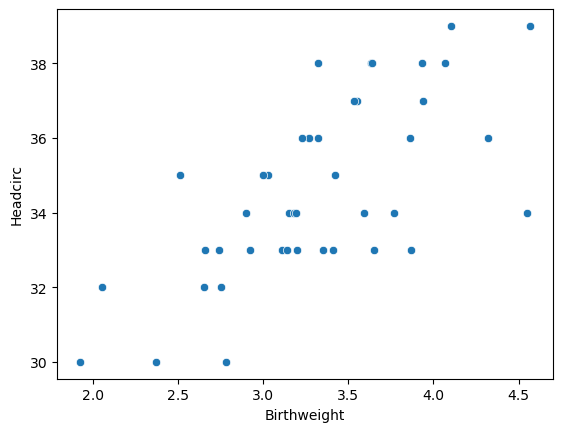

In [8]:
sns.scatterplot(x=df.Birthweight, y=df.Headcirc)

In [10]:
X = sm.add_constant(df.Birthweight)
Y = df.Headcirc
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Headcirc   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     35.29
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           5.73e-07
Time:                        16:41:59   Log-Likelihood:                -82.574
No. Observations:                  42   AIC:                             169.1
Df Residuals:                      40   BIC:                             172.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.5824      1.542     16.594      

## Now, let's add another predicting variable

What's the relationship between length and head circumfrence?

<Axes: xlabel='Length', ylabel='Headcirc'>

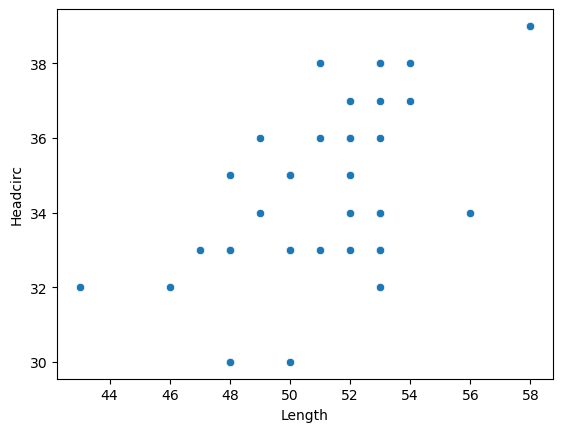

In [12]:
sns.scatterplot(x=df.Length, y=df.Headcirc)

Now we can combine our two 'predictor' variables

In [14]:
# group x variables
X = df[['Birthweight', 'Length']]

# y variable
Y = df['Headcirc']

In [16]:
# using statsmodels
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Headcirc   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     17.84
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           3.14e-06
Time:                        16:42:32   Log-Likelihood:                -82.211
No. Observations:                  42   AIC:                             170.4
Df Residuals:                      39   BIC:                             175.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.0794      5.673      3.716      

In [18]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Intercept:  21.079365879118818
Coefficients:  [0.         2.319074   0.11363204]


So, which package should we use?

In general, scikit-learn is designed for machine-learning, while statsmodels is made for rigorous statistics.

https://medium.com/@hsrinivasan2/linear-regression-in-scikit-learn-vs-statsmodels-568b60792991